# 중분류 카테고리 별 해시태그 분석

In [87]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
# 계통도 분석 라이브러리
import networkx as nx
from matplotlib import rc
rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

from matplotlib import rcParams
%matplotlib inline
import seaborn as sns

In [88]:
df = pd.read_csv('해시태그완성데이터.csv')
df.head()

,관광지명,광역시/도,시/군/구,도로명주소,중분류 카테고리,소분류 카테고리,검색건수,관광지,언급량,관광지명.1,해시태그,가족여부,연인여부,친구여부,아이여부,휴식,교육
0,아산스파비스,충청남도,아산시,충남 아산시 아산온천로157번길 67-0,체험관광,웰니스관광,49046,아산스파비스,1249,아산스파비스,"#가족여행, #관광지, #스파, #아산스파비스, #아이와함께, #연인과함께, #온천...",1,1,0,1,1,0
1,파라다이스스파도고,충청남도,아산시,충남 아산시 도고온천로 176-1,체험관광,웰니스관광,35164,파라다이스스파도고,1055,파라다이스스파도고,"#2023_설날_온천, #가족과함께, #가족여행, #관광지, #데이트코스, #뷰티&...",1,1,0,0,1,0
2,하늘물빛정원,충청남도,금산군,충남 금산군 검한1길 156-0,체험관광,농/산/어촌체험,22495,하늘물빛정원,738,하늘물빛정원,"#가족여행, #걷기길, #관광지, #꽃여행, #먹거리, #미식여행, #사계절, #산...",1,0,0,0,1,0
3,팜카밀레허브농원,충청남도,태안군,충남 태안군 우운길 56-19,체험관광,농/산/어촌체험,21646,팜카밀레허브농원,515,팜카밀레허브농원,"#체험, #팜카밀레허브농원, #충청권, #이색체험, #허브, #관광지, #자연환경,...",0,1,0,1,0,0
4,아그로랜드태신목장,충청남도,예산군,충남 예산군 상몽2길 231-0,체험관광,농/산/어촌체험,20323,아그로랜드태신목장,1050,아그로랜드태신목장,"#2022_추석_당일치기_여행, #가족체험, #관광지, #낙농체험, #아그로랜드태신...",1,0,0,1,1,0


In [89]:
# 해시태그, 콤마, 공백을 공백 한 칸으로 전환하는 함수
def clean_hashtags(text):
    text = text.replace(', ', '')  # 콤마를 공백으로 대체
    text = text.replace('#', ' ')  # 해시태그를 공백으로 대체
    text = text.replace('관광지', '') # 관광지 해시태그 제거
    text = text.replace('충청권', '') # 관광지 해시태그 제거
    text = ' '.join(text.split())  # 공백을 한 칸으로 조정
    return text

# 데이터프레임의 해시태그 컬럼에 적용하여 값 변경
df['hashtags'] = df['해시태그'].apply(clean_hashtags)

In [90]:
df.drop_duplicates('관광지명', inplace=True)

In [91]:
data = df[['hashtags','시/군/구', '중분류 카테고리','관광지명']]
data.reset_index(drop=True, inplace=True)

In [92]:
data.head()

,hashtags,시/군/구,중분류 카테고리,관광지명
0,가족여행 스파 아산스파비스 아이와함께 연인과함께 온천 온천여행 워터파크 휴식공간 휴...,아산시,체험관광,아산스파비스
1,2023_설날_온천 가족과함께 가족여행 데이트코스 뷰티&스파 스파 실내수영장 야외수...,아산시,체험관광,파라다이스스파도고
2,가족여행 걷기길 꽃여행 먹거리 미식여행 사계절 산책길 산책하기 산책하기좋은곳 야경투...,금산군,체험관광,하늘물빛정원
3,체험 팜카밀레허브농원 이색체험 허브 자연환경 자연좋은곳 아이와함께 연인과함께 남녀노...,태안군,체험관광,팜카밀레허브농원
4,2022_추석_당일치기_여행 가족체험 낙농체험 아그로랜드태신목장 아이가_좋아하는_여...,예산군,체험관광,아그로랜드태신목장


In [93]:
data

,hashtags,시/군/구,중분류 카테고리,관광지명
0,가족여행 스파 아산스파비스 아이와함께 연인과함께 온천 온천여행 워터파크 휴식공간 휴...,아산시,체험관광,아산스파비스
1,2023_설날_온천 가족과함께 가족여행 데이트코스 뷰티&스파 스파 실내수영장 야외수...,아산시,체험관광,파라다이스스파도고
2,가족여행 걷기길 꽃여행 먹거리 미식여행 사계절 산책길 산책하기 산책하기좋은곳 야경투...,금산군,체험관광,하늘물빛정원
3,체험 팜카밀레허브농원 이색체험 허브 자연환경 자연좋은곳 아이와함께 연인과함께 남녀노...,태안군,체험관광,팜카밀레허브농원
4,2022_추석_당일치기_여행 가족체험 낙농체험 아그로랜드태신목장 아이가_좋아하는_여...,예산군,체험관광,아그로랜드태신목장
...,...,...,...,...
392,문화시설 사비도성가상체험관 이색체험 가족이색체험 아이와함께 가족과함께 체험프로그램 ...,부여군,기타관광,사비도성가상체험관
393,경치좋은곳 남녀노소 드라이브여행 드라이브코스 바다경치 바다내음 연인과함께 해안도로 ...,보령시,기타관광,은포리해안도로
394,바다풍경 자연 홍성방조제 힐링,보령시,기타관광,홍성방조제
395,가족여행 모세의기적 신비의바닷길 아이와함께 이색체험 자연 진도신비의바닷길 친구와함께,보령시,기타관광,신비의바닷길


In [94]:
# 결과를 저장할 빈 데이터프레임 생성
result_df = pd.DataFrame(columns=['word', 'city','category'])

# 반복문을 통해 데이터프레임 생성
for i in range(len(data)):
    # 주어진 문자열
    hashtags = data['hashtags'][i]
    incity = data['시/군/구'][i]
    mc = data['중분류 카테고리'][i]
    travel = data['관광지명'][i]

    # 단어 단위로 분할하여 리스트로 변환
    word_list = hashtags.split(' ')

    # 새로운 데이터프레임 생성
    rd = pd.DataFrame({
        'word': word_list,
        'city': incity,
        'category':mc,
        'place':travel
    })

    # 생성한 데이터프레임을 결과 데이터프레임에 추가
    result_df = pd.concat([result_df, rd], ignore_index=True)

In [95]:
result_df

,word,city,category,place
0,가족여행,아산시,체험관광,아산스파비스
1,스파,아산시,체험관광,아산스파비스
2,아산스파비스,아산시,체험관광,아산스파비스
3,아이와함께,아산시,체험관광,아산스파비스
4,연인과함께,아산시,체험관광,아산스파비스
...,...,...,...,...
4506,이색체험,당진시,기타관광,독일마을
4507,체험학습,당진시,기타관광,독일마을
4508,친구와함께,당진시,기타관광,독일마을
4509,한국관광100선,당진시,기타관광,독일마을


In [96]:
# 전체 해시태그 분석
all_tags = result_df.groupby('word').count()[['city']]

In [97]:
all_tags.columns = ['count']

In [98]:
all_tags.reset_index(drop=False, inplace=True)

In [99]:
all_tags

,word,count
0,15_16한국관광100선,2
1,19_20한국관광100선,7
2,2018년8월추천가볼만한곳,1
3,2020_휴가철찾아가고싶은_33섬,1
4,2020비대면_가을편,3
...,...,...
991,힐링&여행,1
992,힐링&휴양,2
993,힐링&휴양여행,6
994,힐링산책,6


In [100]:
all_tags.sort_values(by='count', ascending=False, inplace=True)

In [101]:
tags50 = all_tags[:50]
tags50.head()

,word,count
607,역사,180
559,아이와함께,146
719,자연,116
30,가족여행,115
728,자연좋은곳,111


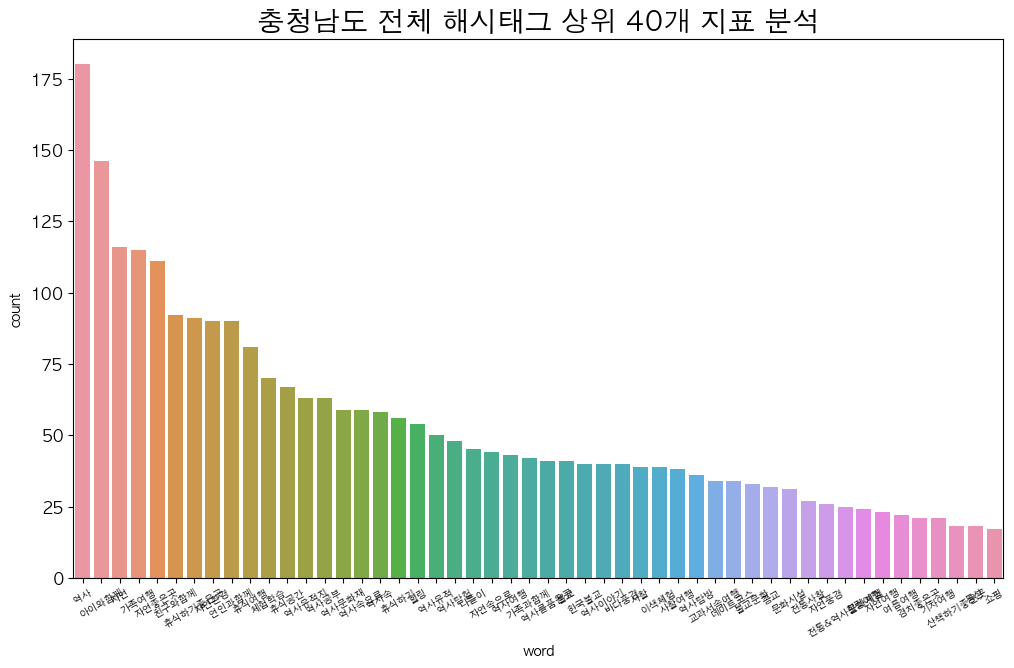

In [102]:
import seaborn as sns

rcParams['figure.figsize'] = 12,7
sns.barplot(data = tags50[:40],
           x=tags50['word'],
           y=tags50['count']);
plt.title('충청남도 전체 해시태그 상위 40개 지표 분석', size=20)
plt.xticks(rotation=30,size=7)
plt.yticks(size=12)
plt.show()

# 중분류 카테고리별 분석

In [53]:
cat_tags = result_df.groupby(['category','word']).count().reset_index()

In [55]:
cat_tags['category'].value_counts()

문화관광     334
자연관광     297
역사관광     283
기타관광     156
체험관광     139
쇼핑        83
레저스포츠     39
음식        24
Name: category, dtype: int64

In [56]:
cat_tags['category'].unique()

array(['기타관광', '레저스포츠', '문화관광', '쇼핑', '역사관광', '음식', '자연관광', '체험관광'],
      dtype=object)

In [70]:
cat_df = cat_tags[cat_tags['category']==cat_tags['category'].unique()[5]]
cat_df.drop('city',axis=1, inplace=True)
cat_df.columns = ['category','word','count']
cat_df.sort_values(by='count', ascending=False, inplace=True)
cat_df = cat_df[:40]
cat_df.head()

,category,word,count
903,음식,서산데이트코스,2
910,음식,음식,2
896,음식,논산데이트코스,2
895,음식,남녀노소,1
908,음식,순대국밥,1


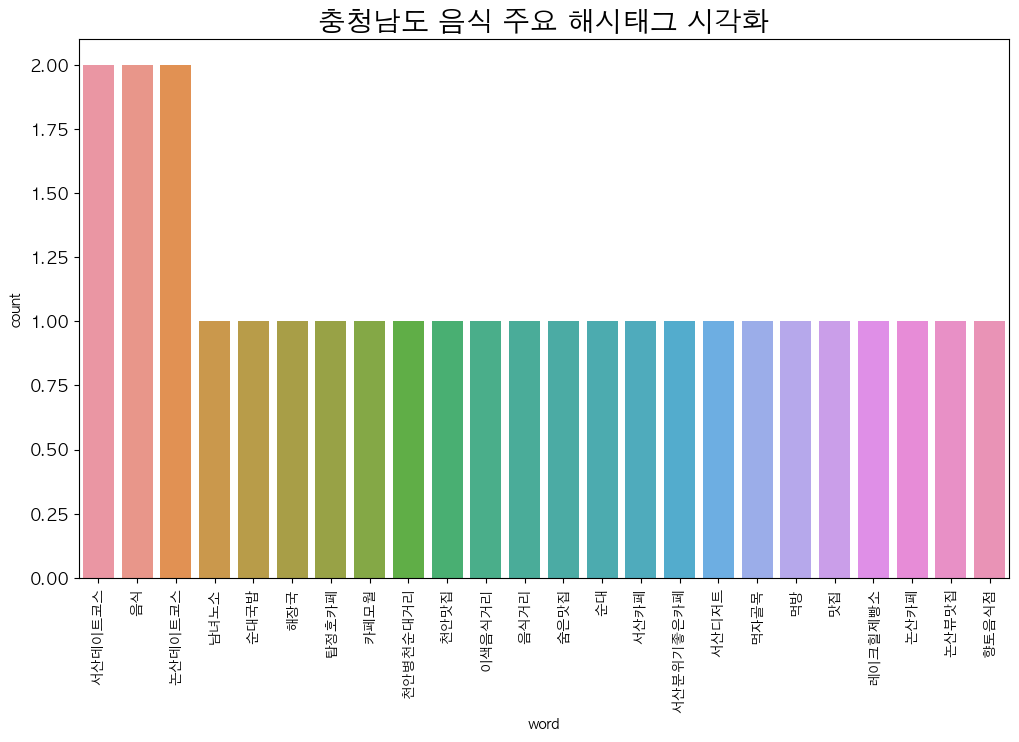

In [72]:
rcParams['figure.figsize'] = 12,7
sns.barplot(data = cat_df,
           x=cat_df['word'],
           y=cat_df['count']);
plt.title('충청남도 {} 주요 해시태그 시각화'.format(cat_tags['category'].unique()[5]), size=20)
plt.xticks(rotation=90,size=10)
plt.yticks(size=12)
plt.show()

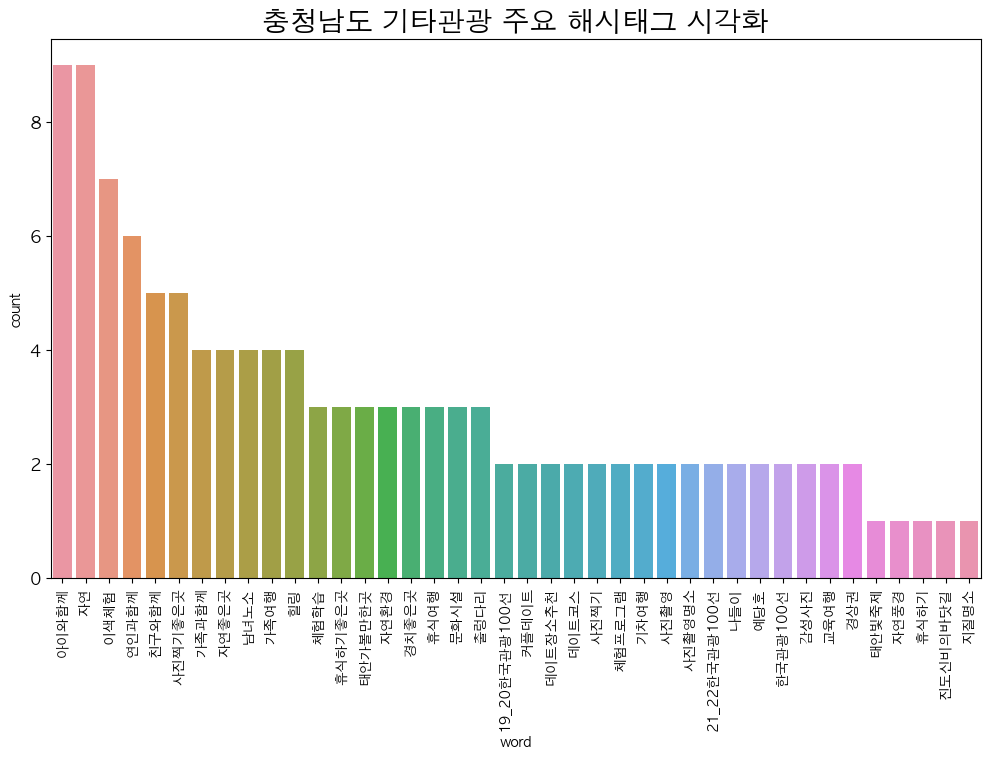

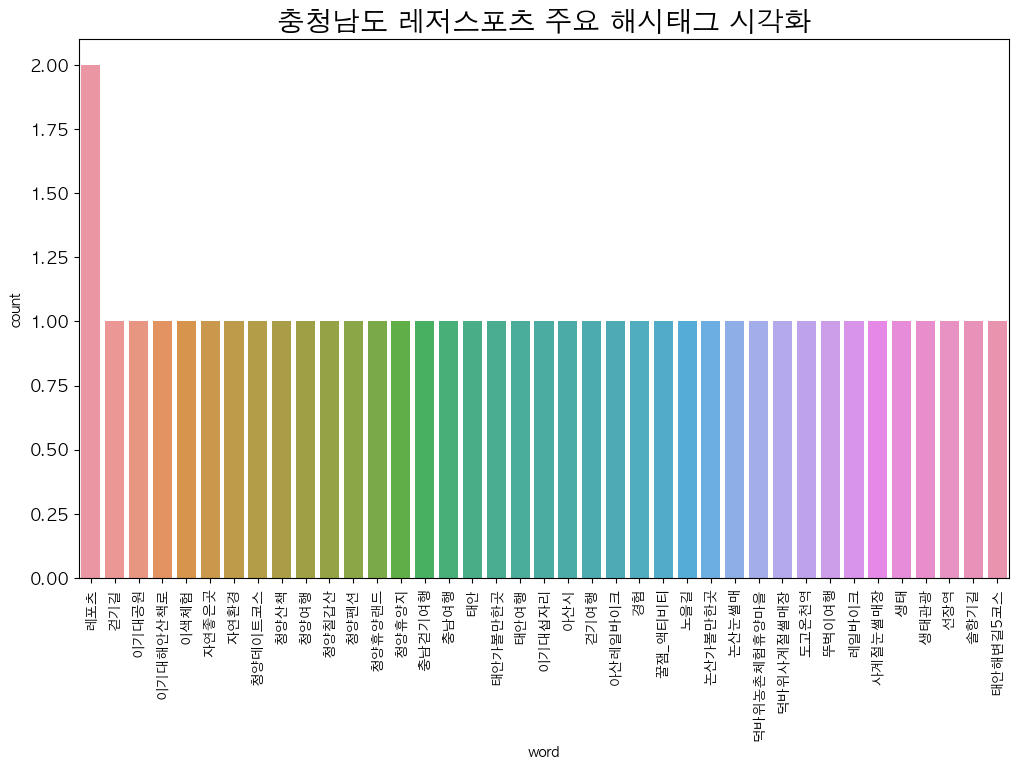

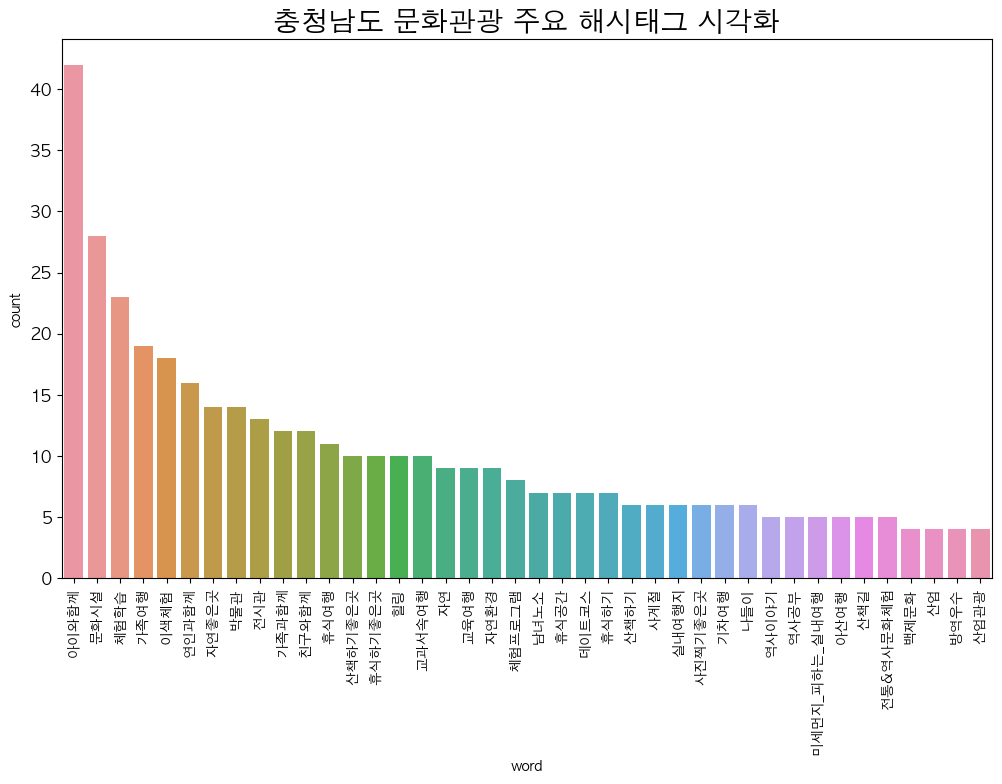

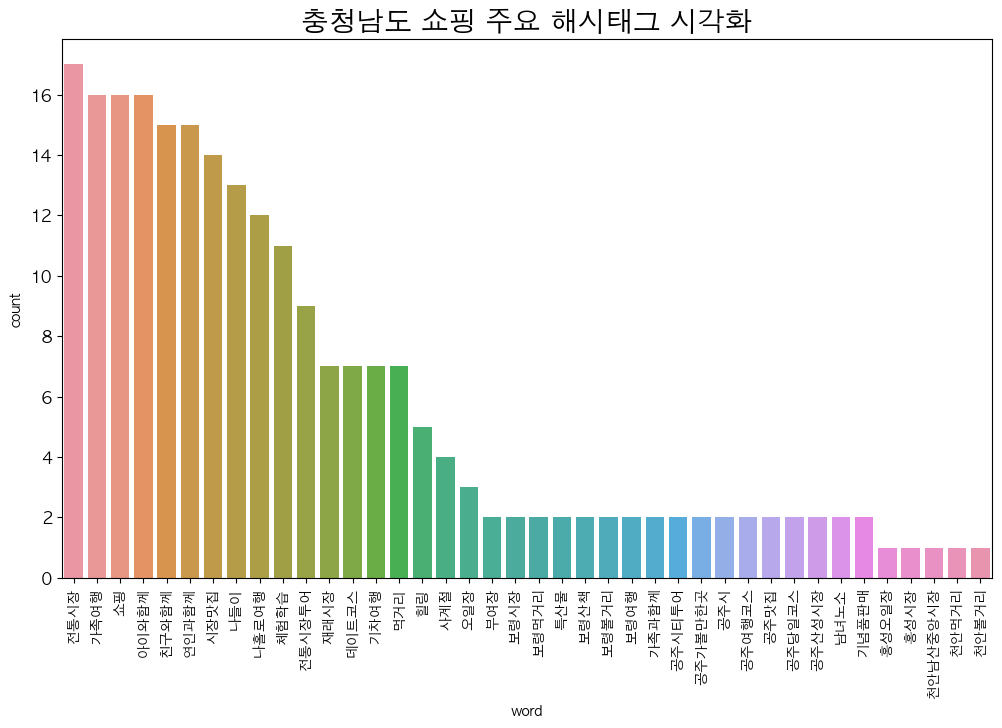

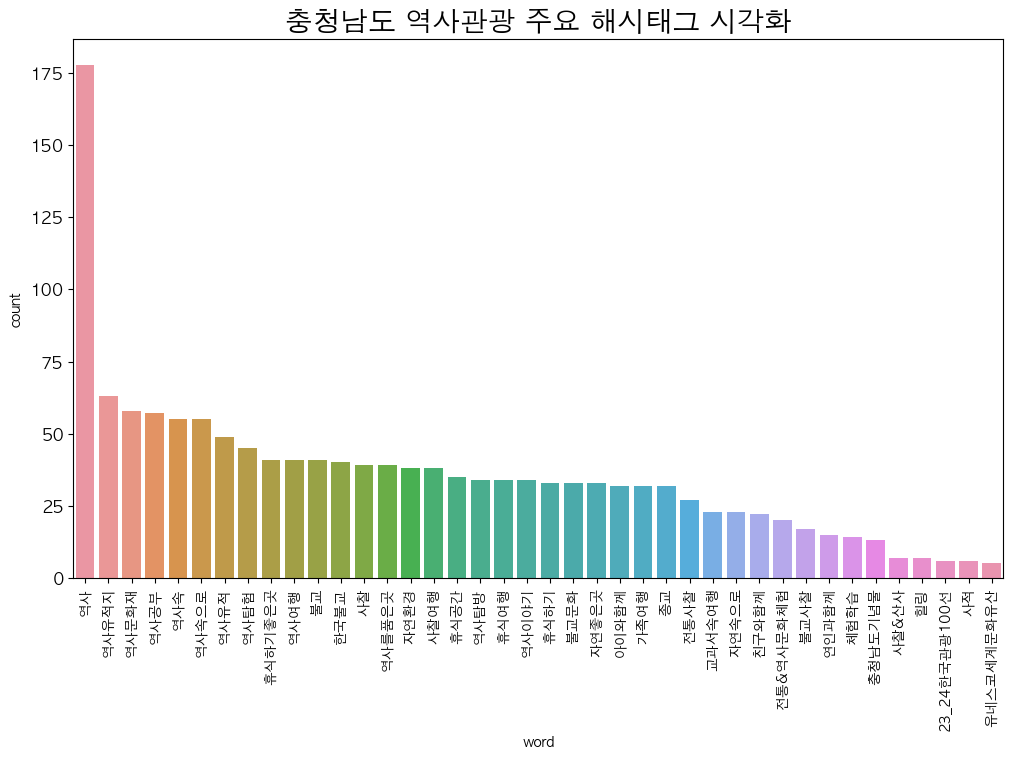

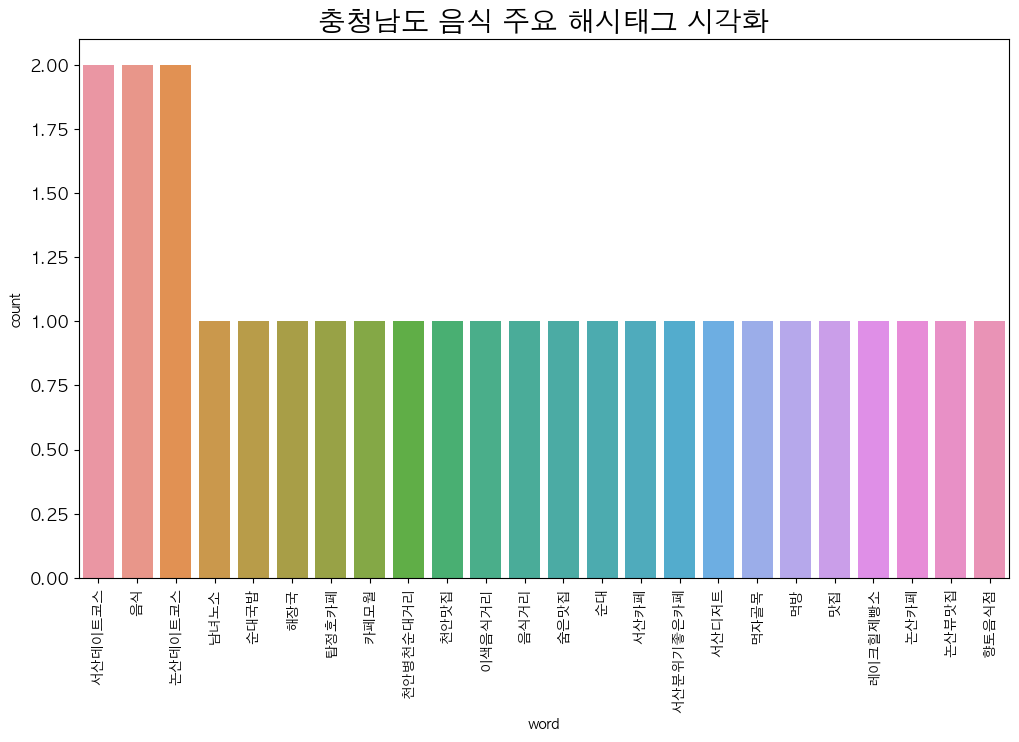

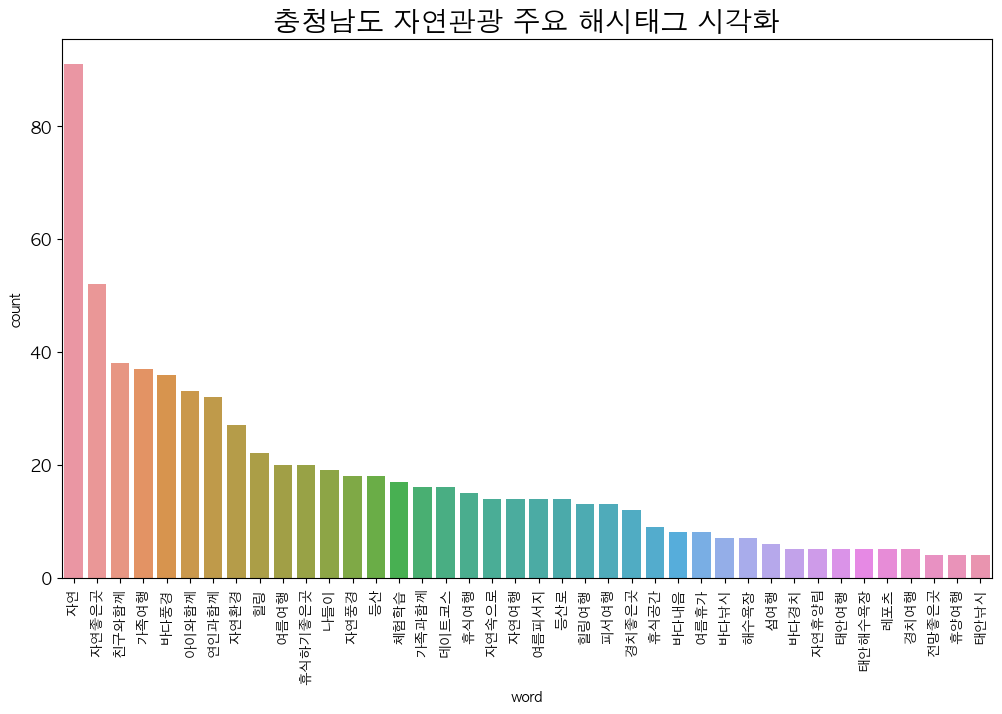

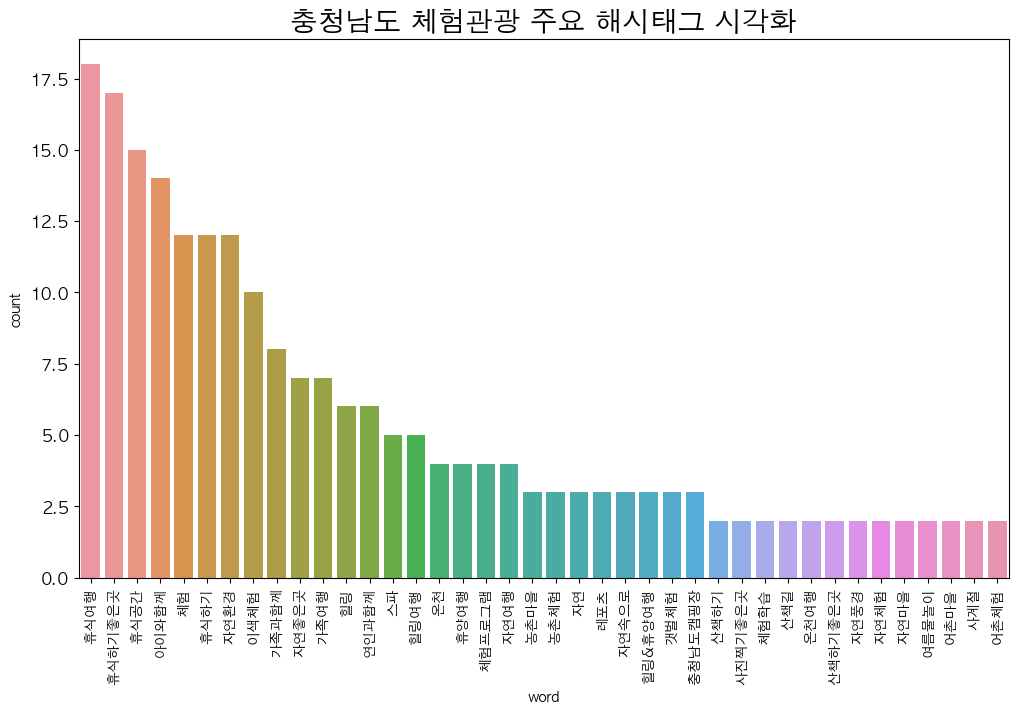

In [103]:
# 반복문으로 모든 태그들 시각화 할 수 있게끔
for i in range(len(cat_tags['category'].unique())):
    rcParams['figure.figsize'] = 12,7
    cat_df = cat_tags[cat_tags['category']==cat_tags['category'].unique()[i]]
    cat_df.drop('city',axis=1, inplace=True)
    cat_df.columns = ['category','word','count']
    cat_df.sort_values(by='count', ascending=False, inplace=True)
    cat_df = cat_df[:40]
    
    sns.barplot(data = cat_df,
           x=cat_df['word'],
           y=cat_df['count']);
    plt.title('충청남도 {} 주요 해시태그 시각화'.format(cat_tags['category'].unique()[i]), size=20)
    plt.xticks(rotation=90,size=10)
    plt.yticks(size=12)
    plt.show()

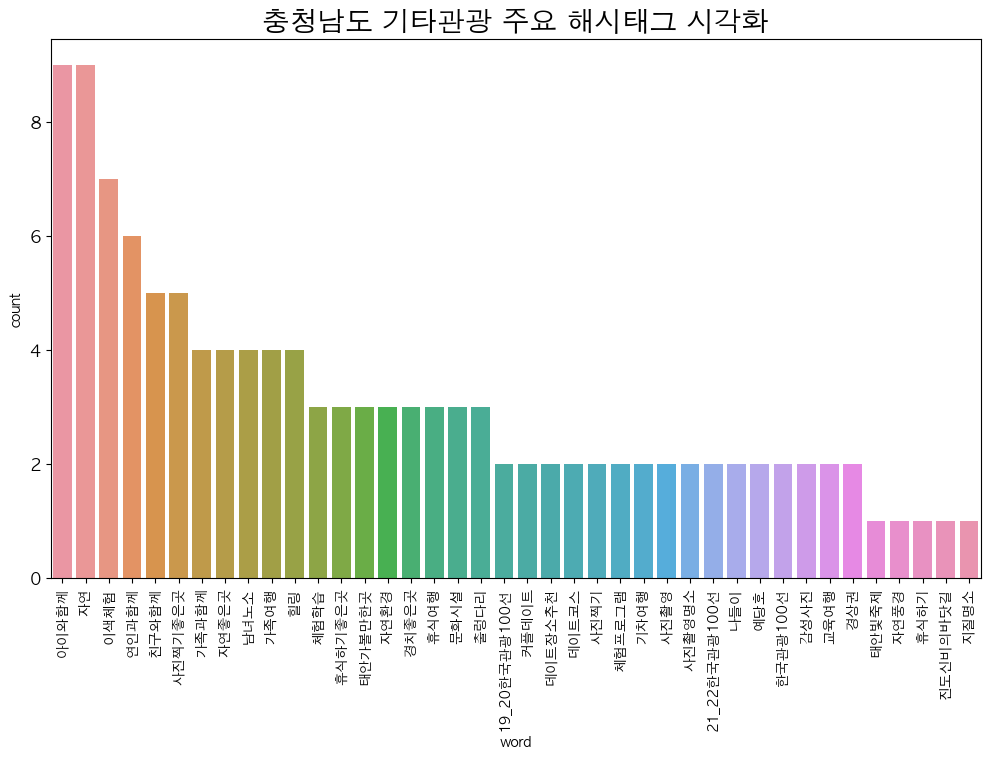

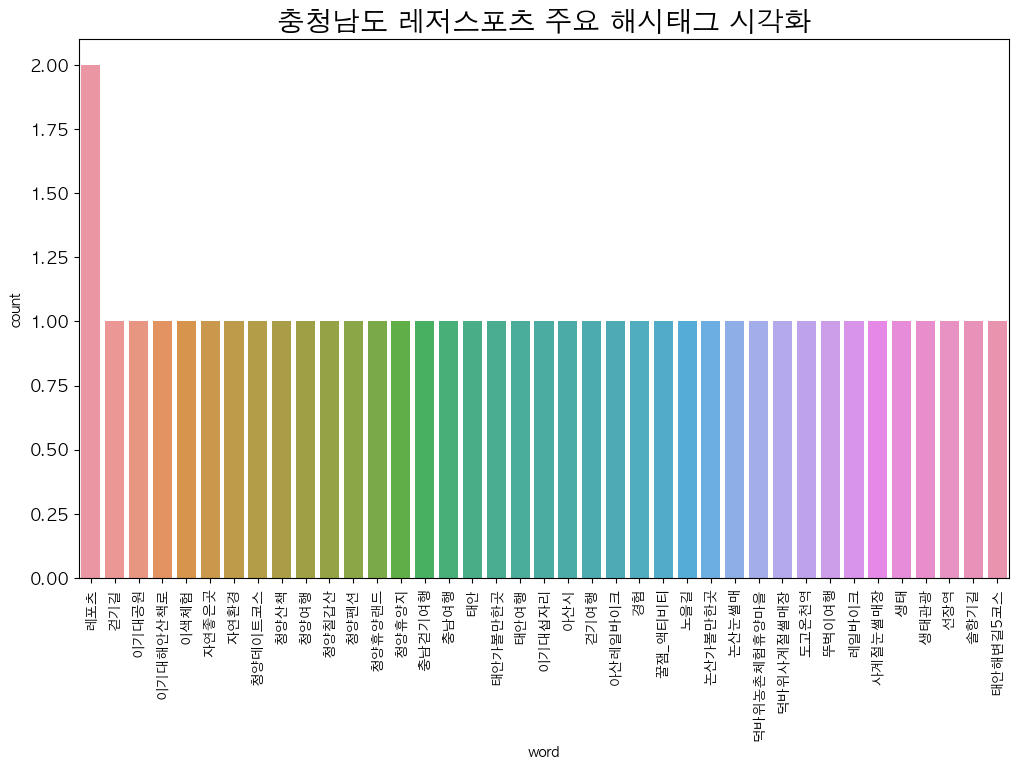

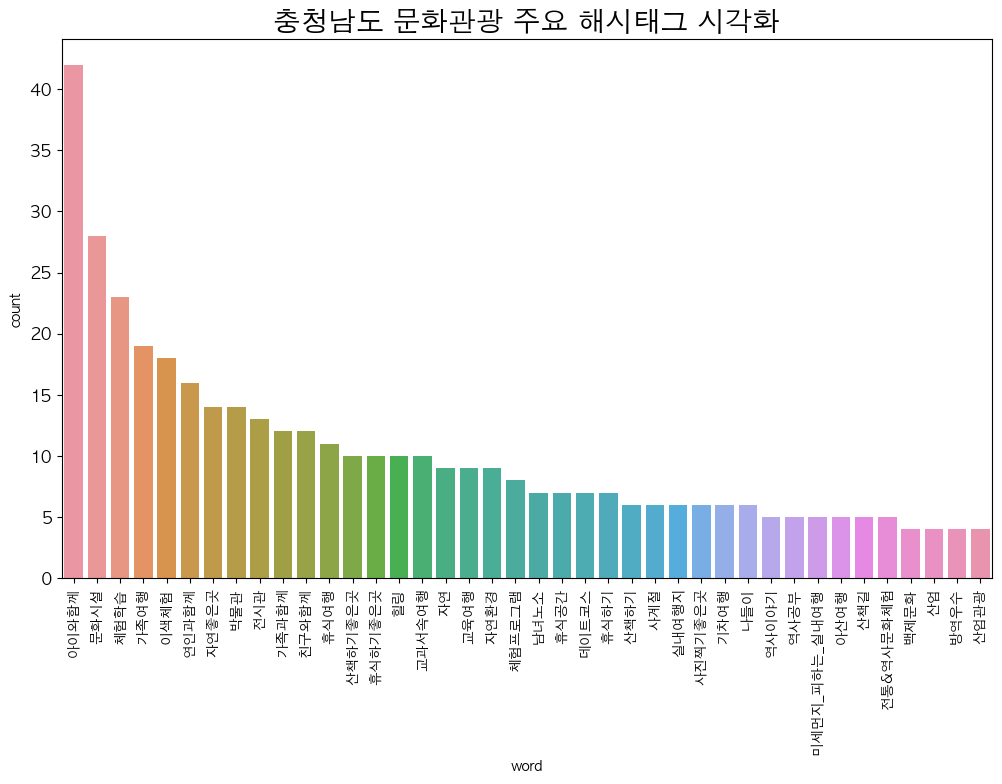

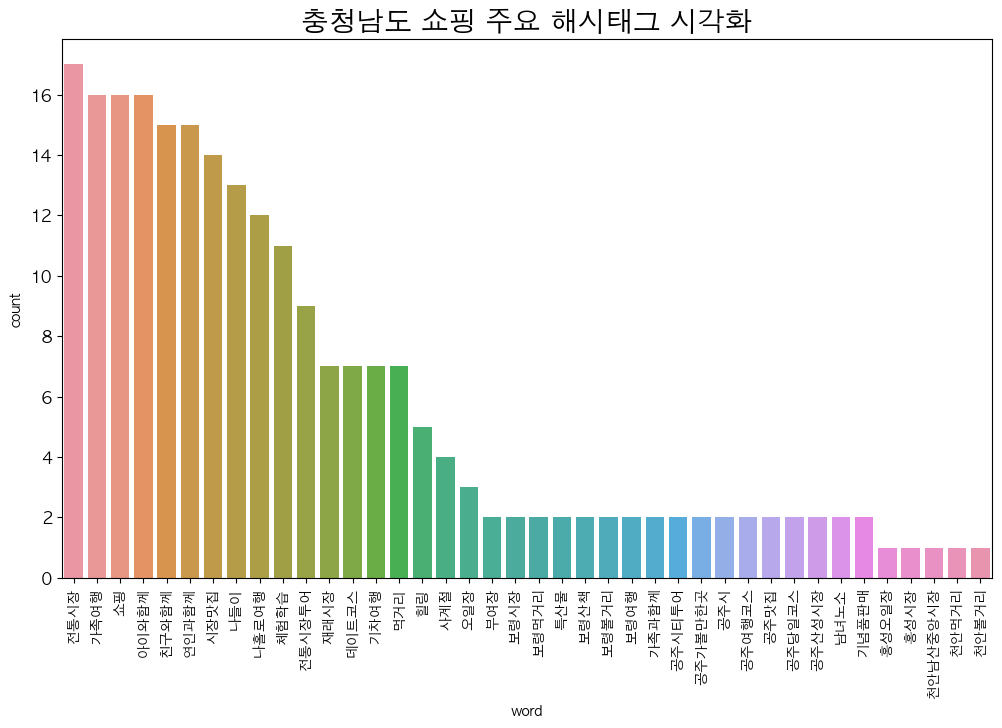

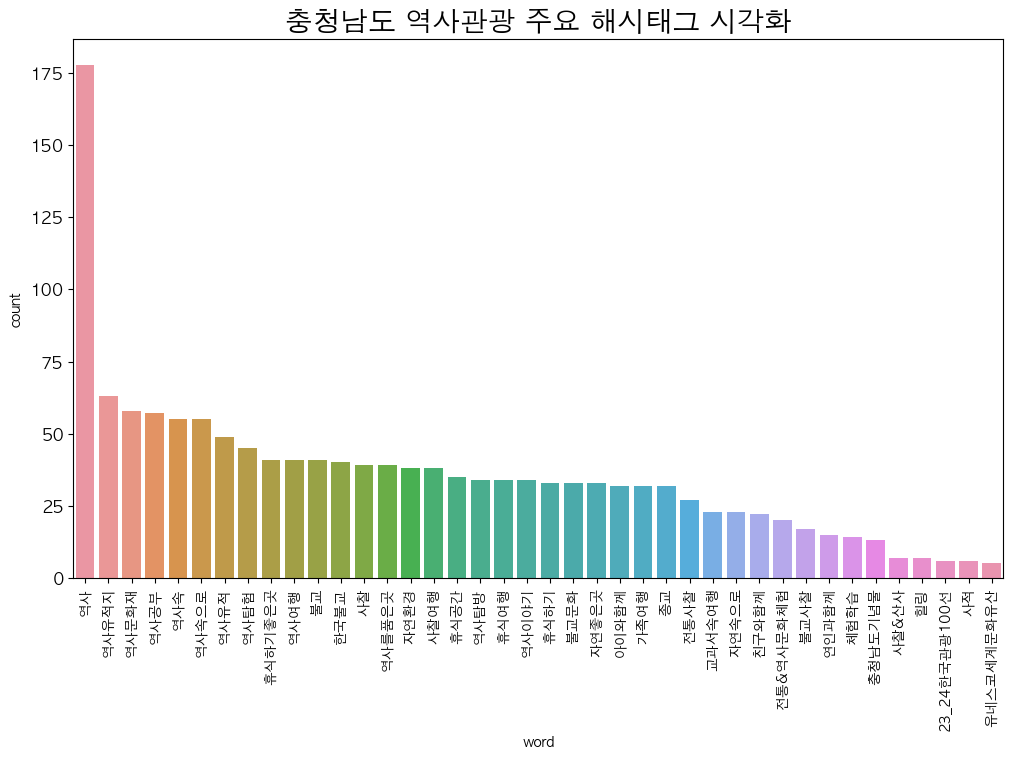

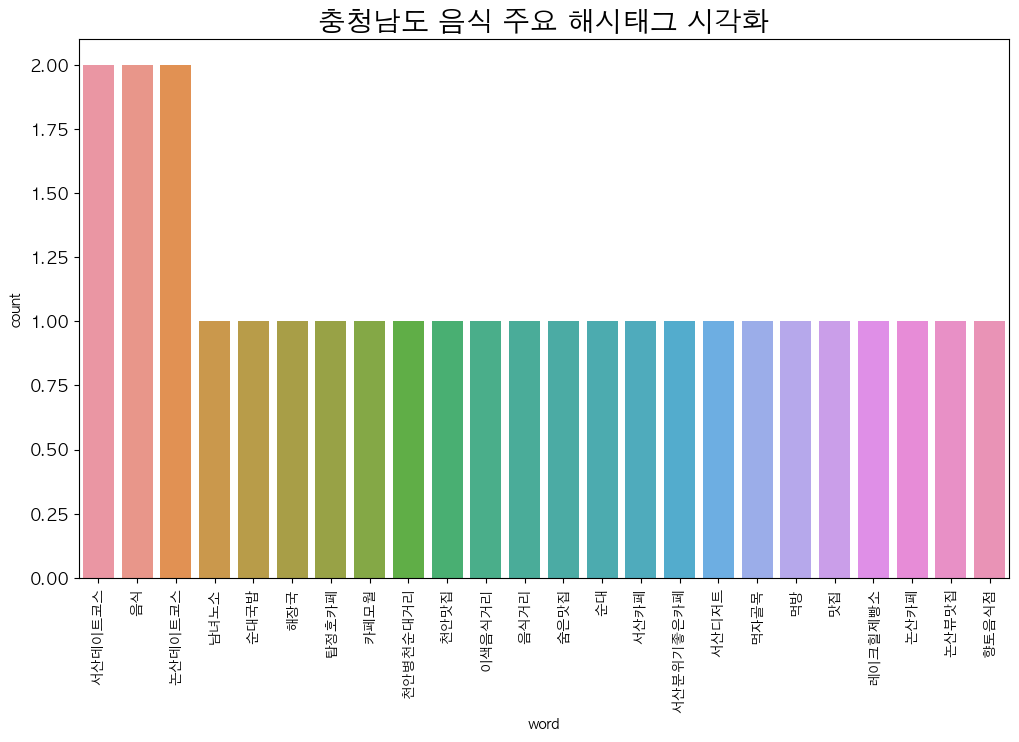

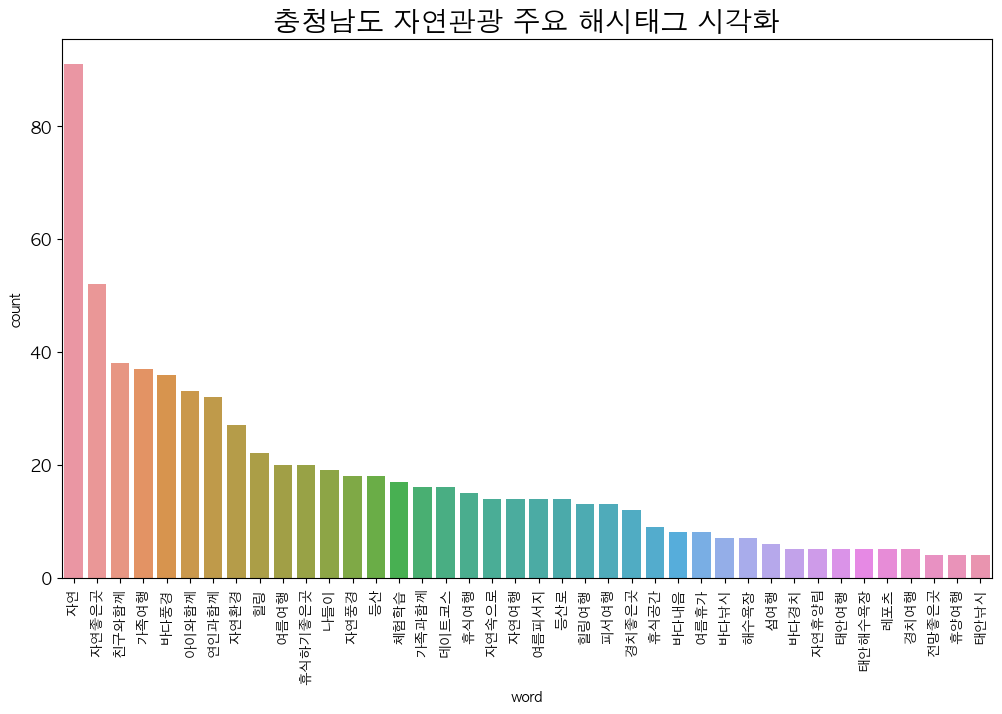

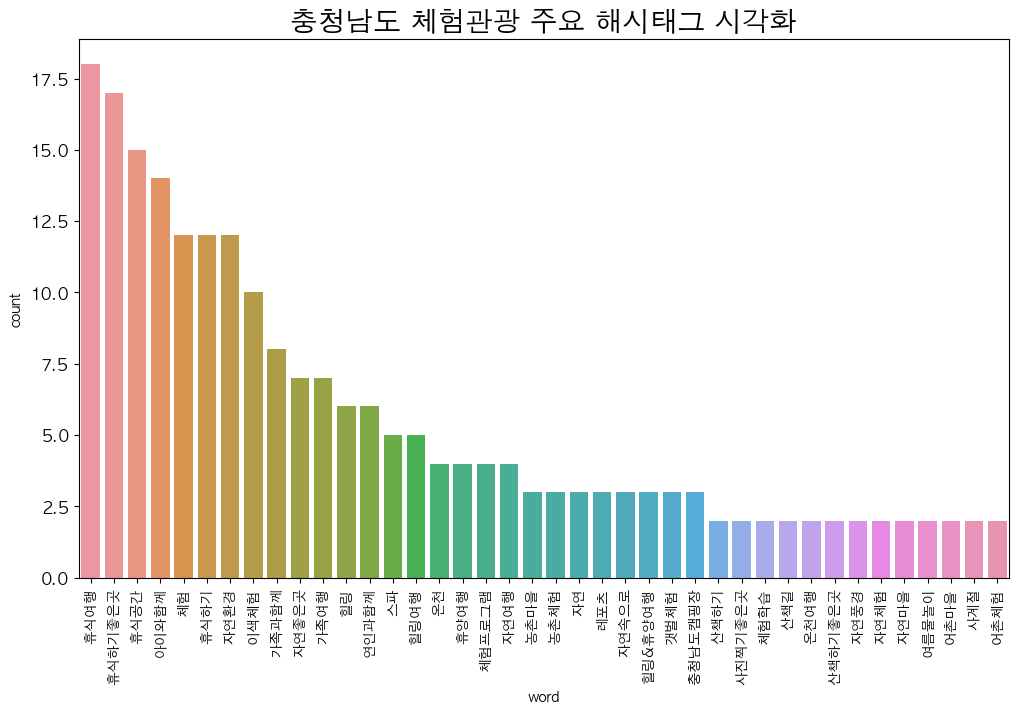

In [104]:
total_count = pd.DataFrame()
for i in range(len(cat_tags['category'].unique())):
    rcParams['figure.figsize'] = 12,7
    cat_df = cat_tags[cat_tags['category']==cat_tags['category'].unique()[i]]
    cat_df.drop('city',axis=1, inplace=True)
    cat_df.columns = ['category','word','count']
    cat_df.sort_values(by='count', ascending=False, inplace=True)
    cat_df = cat_df[:40]
    
    sns.barplot(data = cat_df,
           x=cat_df['word'],
           y=cat_df['count']);
    plt.title('충청남도 {} 주요 해시태그 시각화'.format(cat_tags['category'].unique()[i]), size=20)
    plt.xticks(rotation=90,size=10)
    plt.yticks(size=12)
    total_count = pd.concat([total_count, cat_df])
    plt.show()

In [112]:
total_count.groupby('word').sum().sort_values(by='count', ascending=False)[1:12]

,count
word,
아이와함께,146
가족여행,115
자연,112
자연좋은곳,111
친구와함께,92
휴식하기좋은곳,91
자연환경,90
연인과함께,90
휴식여행,81


In [114]:
total_count['category'].value_counts()

기타관광     40
문화관광     40
쇼핑       40
역사관광     40
자연관광     40
체험관광     40
레저스포츠    39
음식       24
Name: category, dtype: int64

# 시군구별 주요 해시태그 시각화

In [75]:
city_tags = result_df.groupby(['city','word']).count().reset_index()

In [76]:
city_tags

,city,word,category,place
0,계룡시,가족과함께,1,1
1,계룡시,가족여행,1,1
2,계룡시,계룡문화예술의전당,1,1
3,계룡시,괴목정,1,1
4,계룡시,데이트코스,1,1
...,...,...,...,...
2086,홍성군,홍성풍력발전,1,1
2087,홍성군,휴식공간,3,3
2088,홍성군,휴식여행,3,3
2089,홍성군,휴식하기,4,4


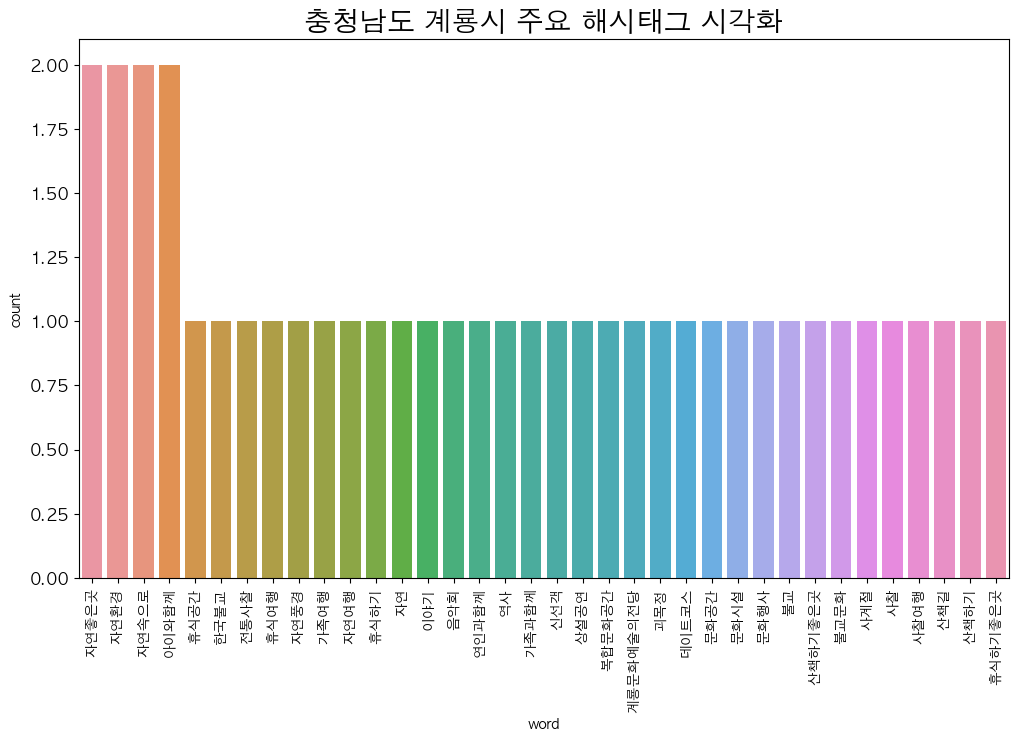

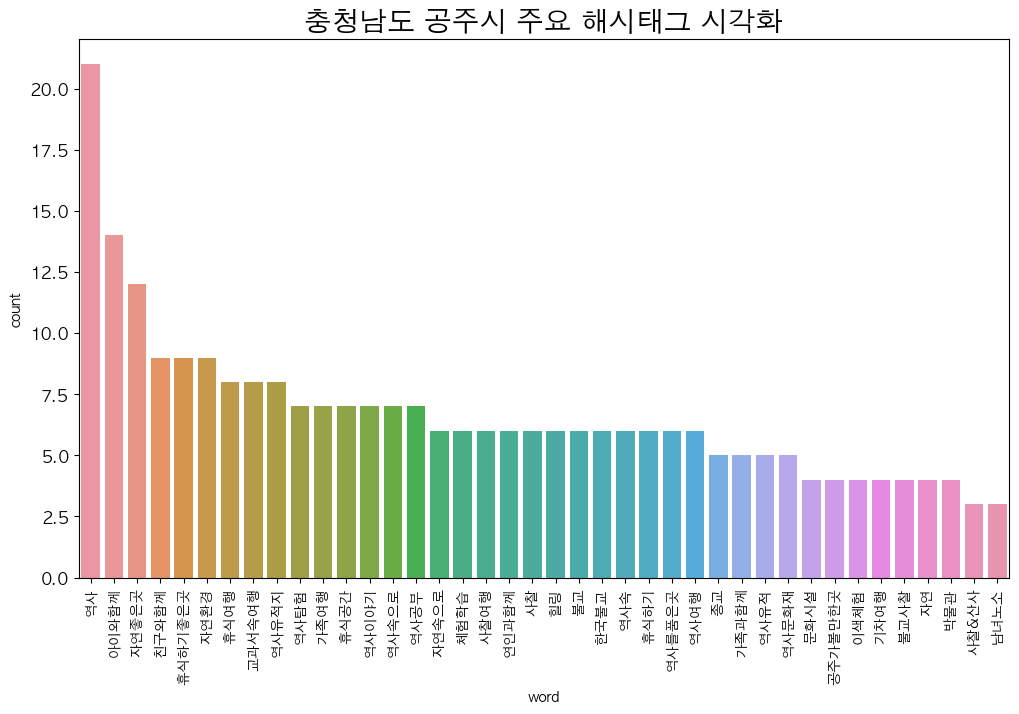

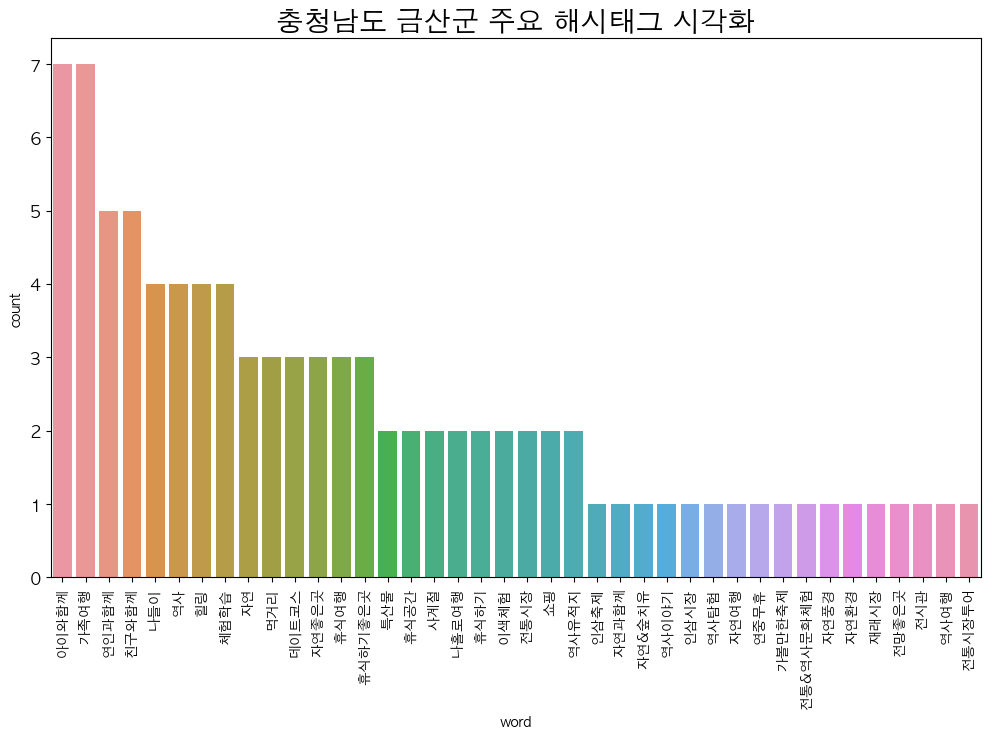

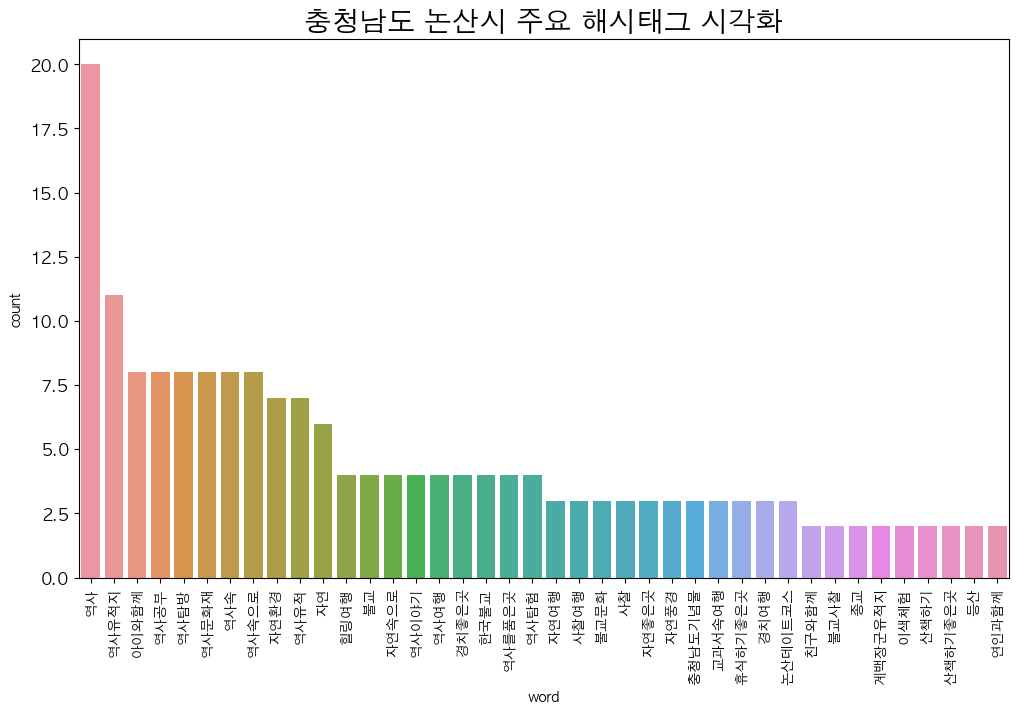

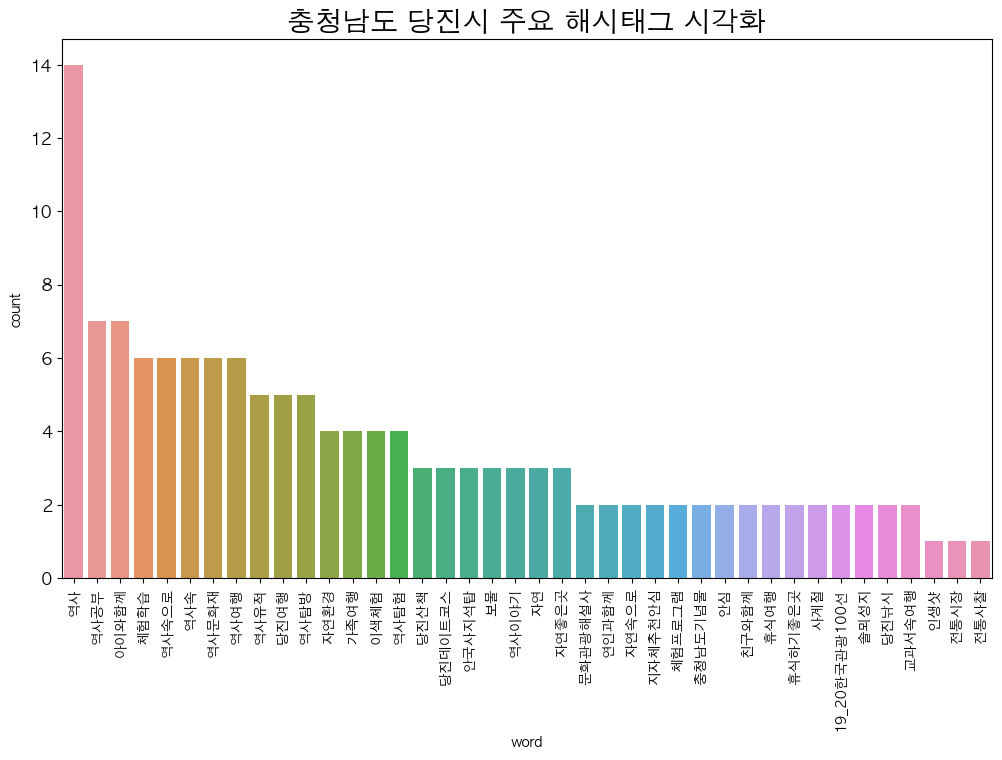

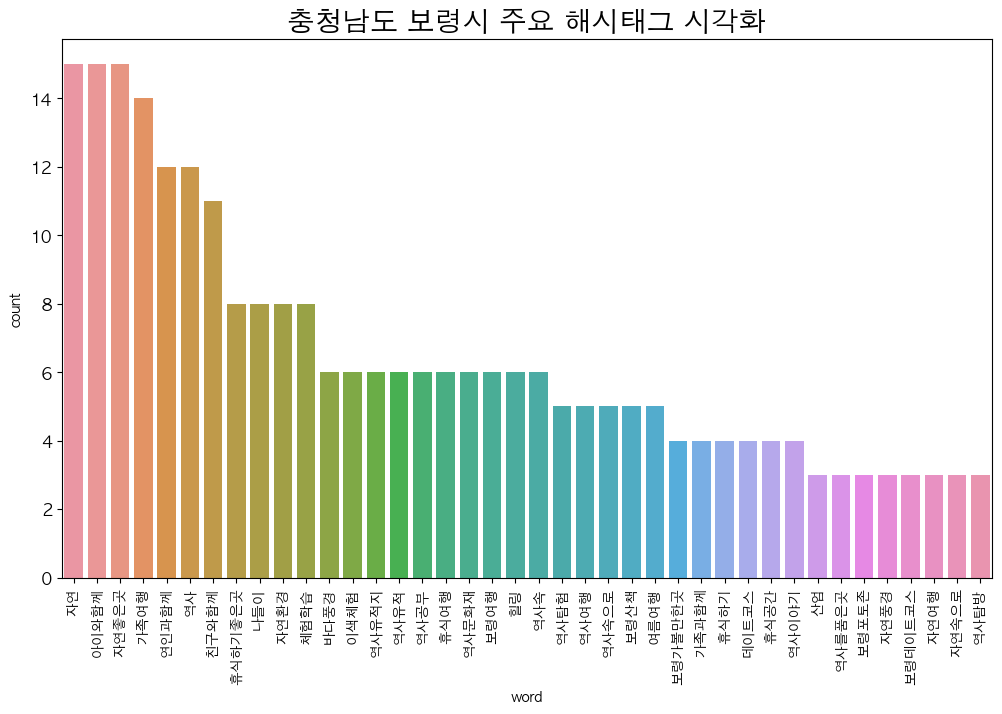

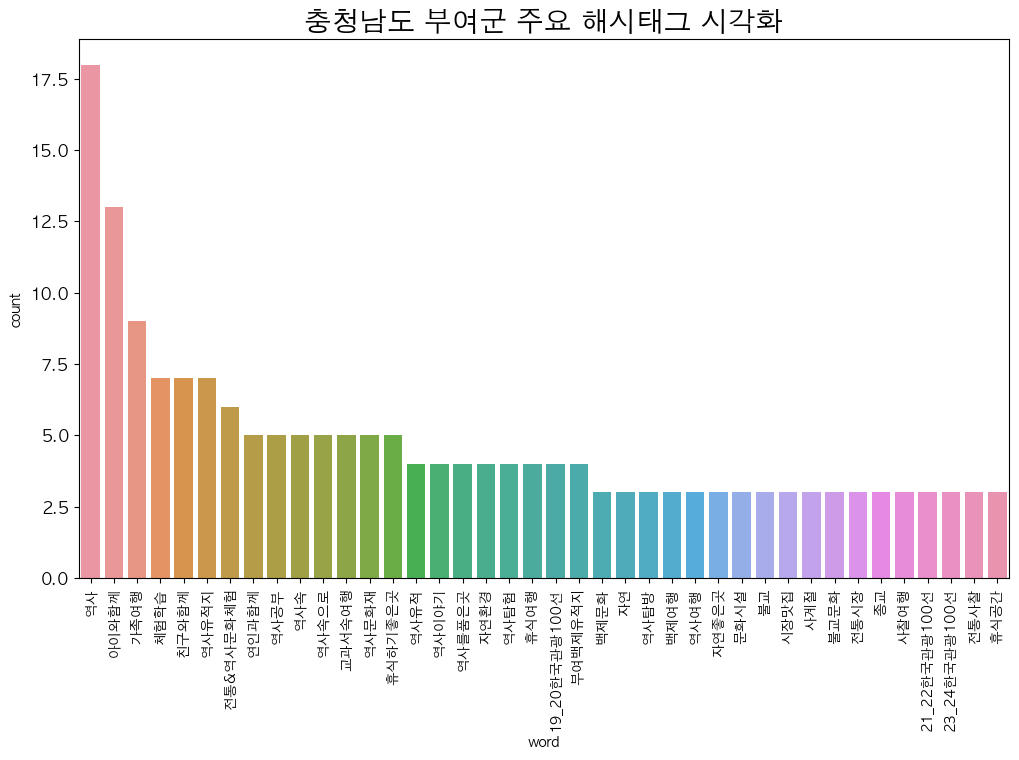

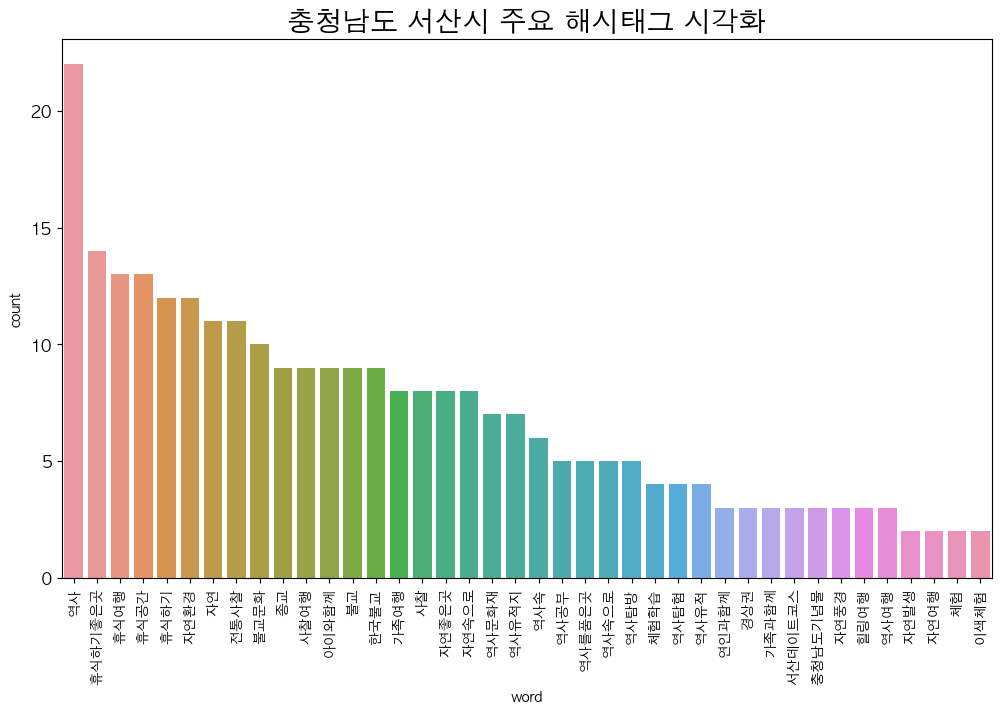

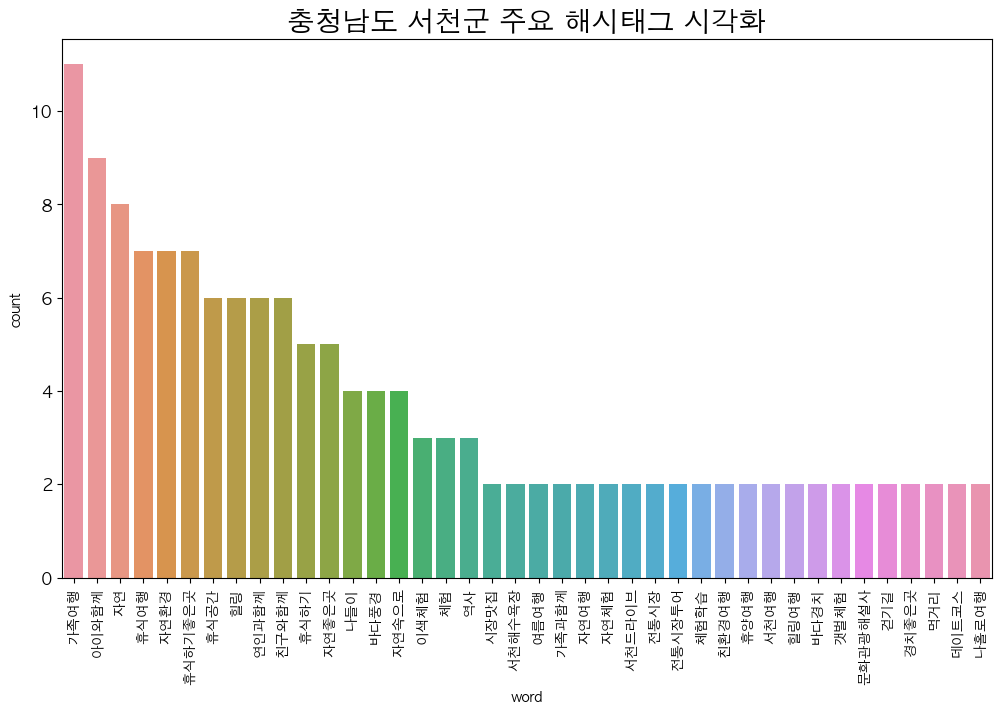

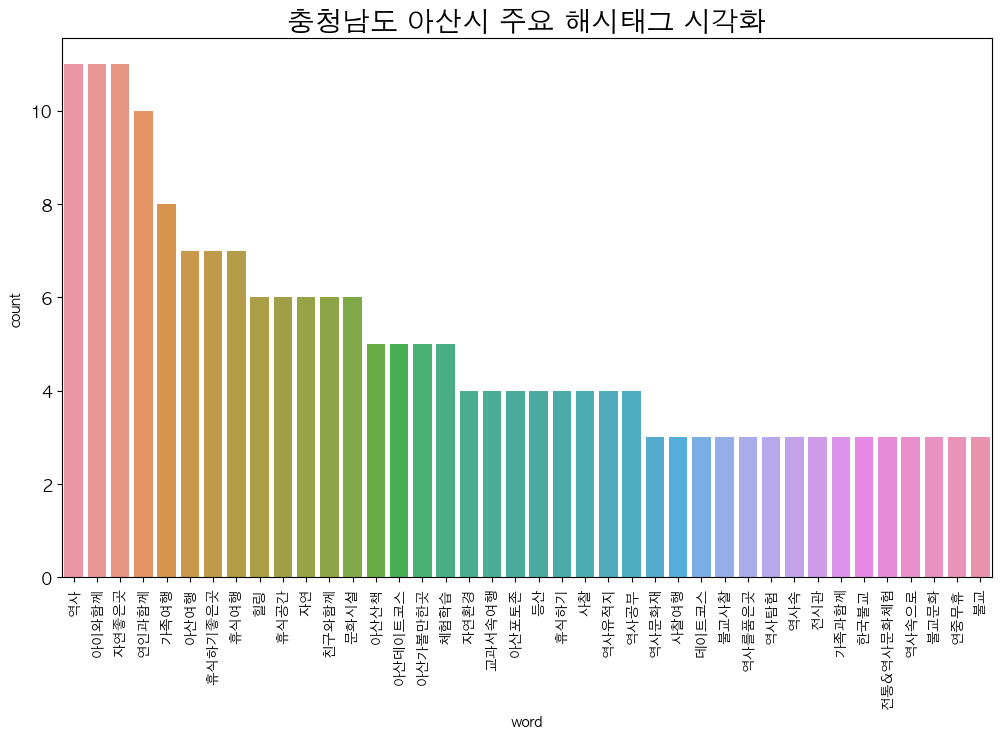

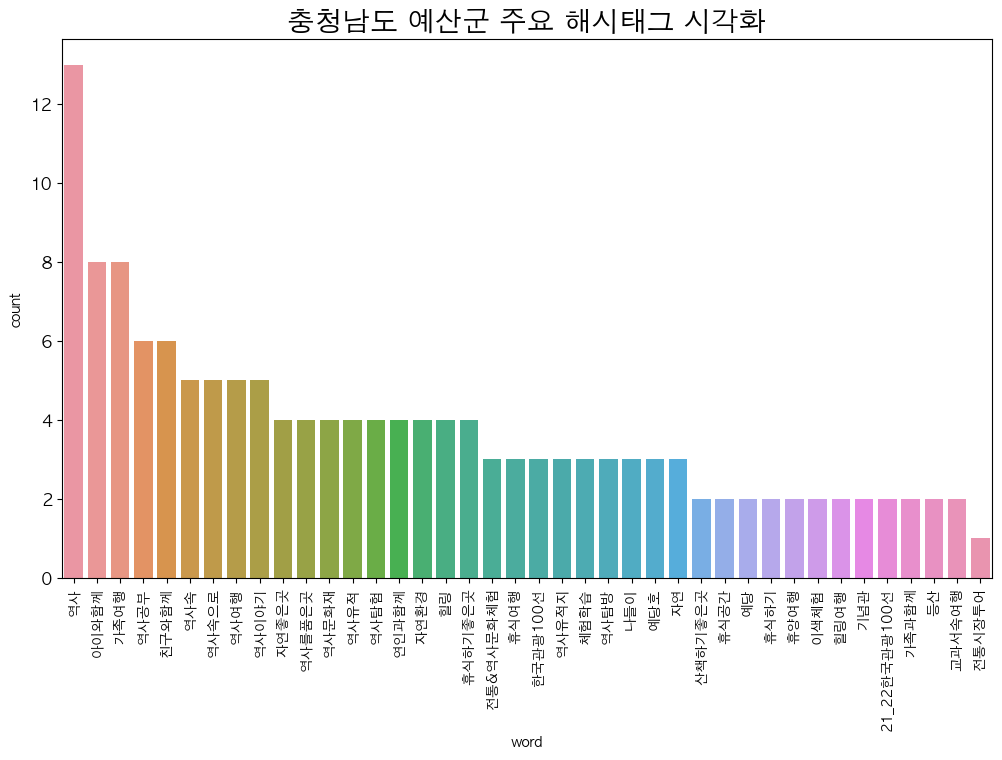

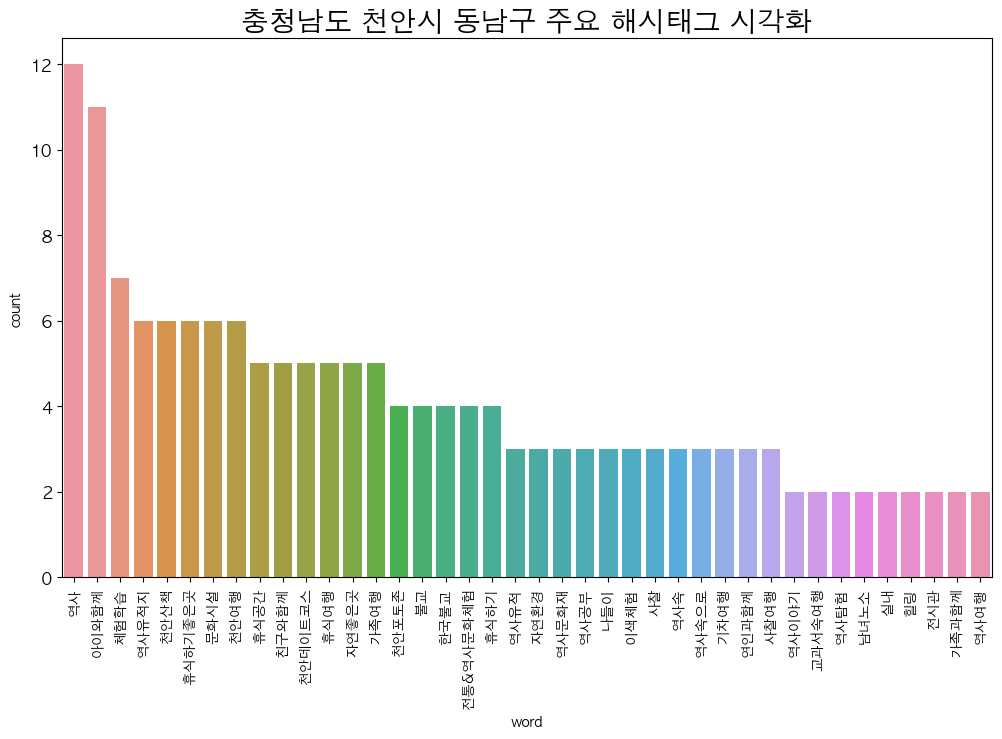

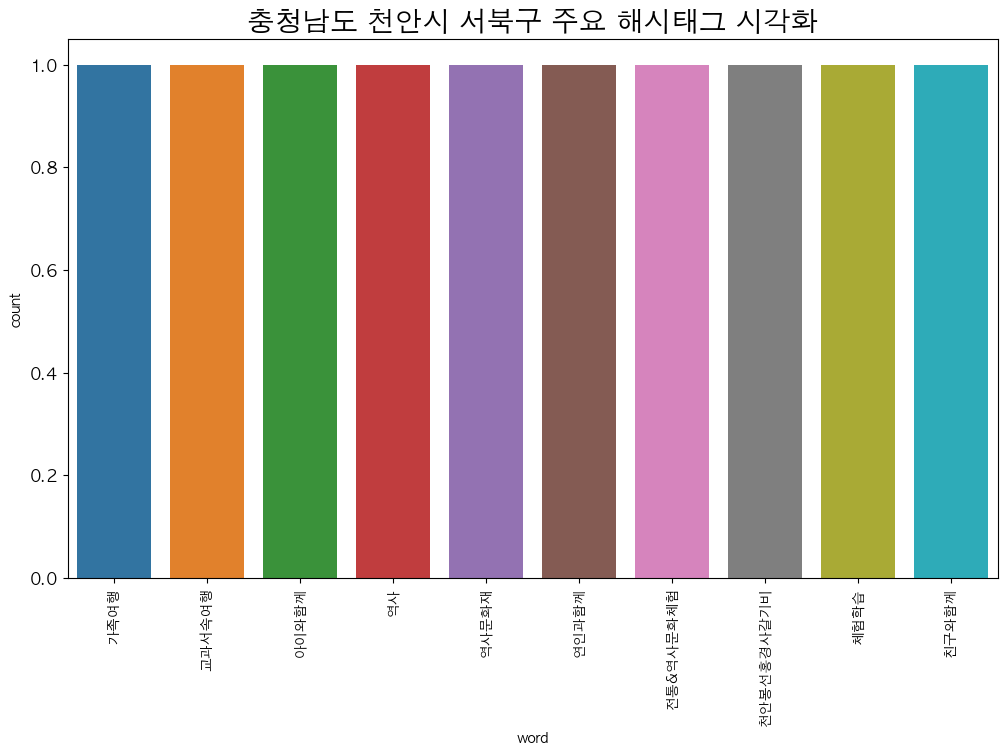

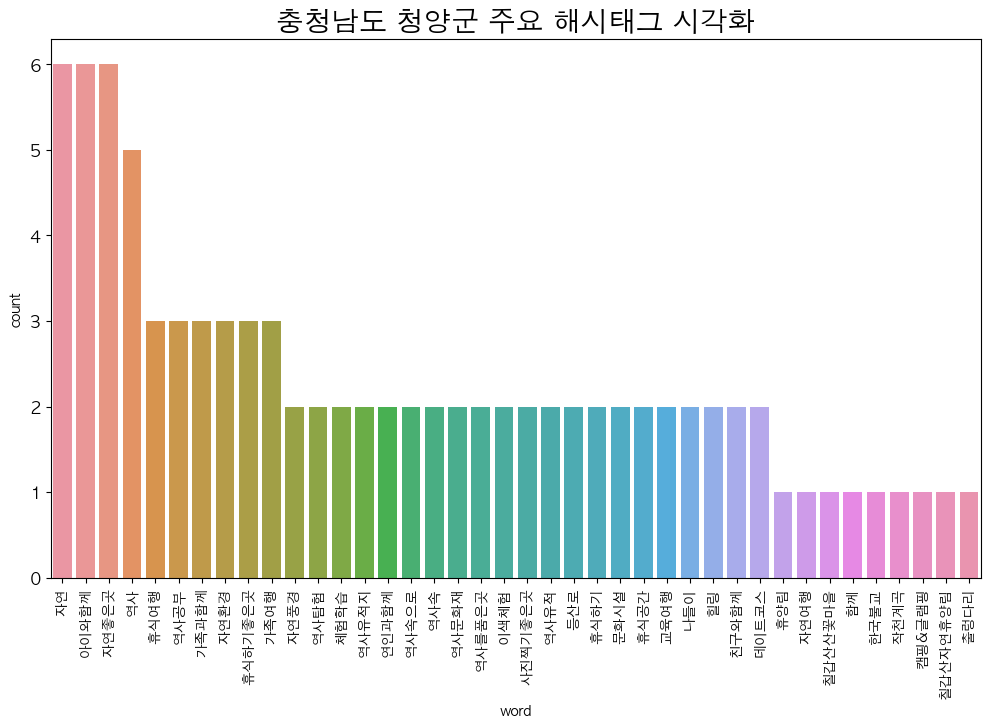

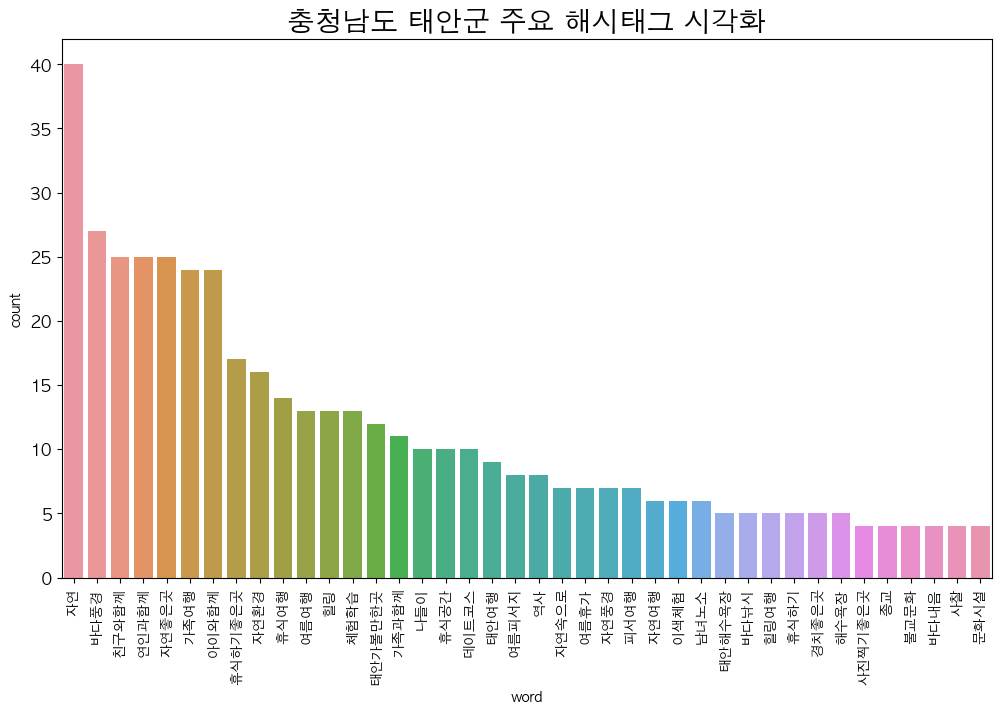

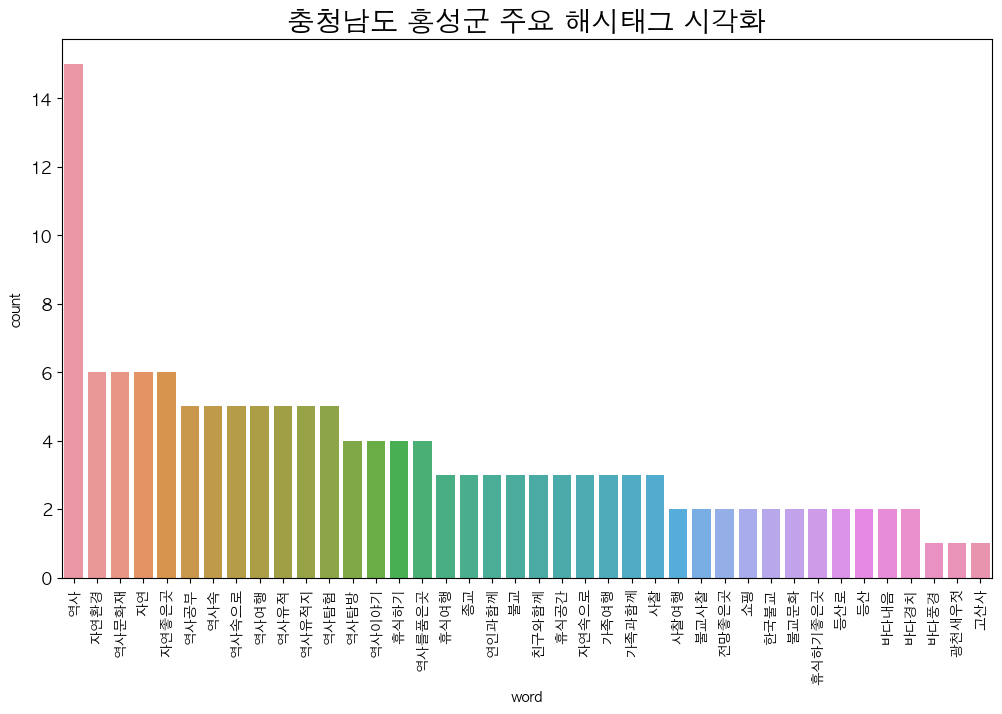

In [86]:
# 반복문으로 모든 태그들 시각화 할 수 있게끔
for i in range(len(city_tags['city'].unique())):
    rcParams['figure.figsize'] = 12,7
    city_df = city_tags[city_tags['city']==city_tags['city'].unique()[i]]
    city_df.drop('place',axis=1, inplace=True)
    city_df.columns = ['city','word','count']
    city_df.sort_values(by='count', ascending=False, inplace=True)
    city_df = city_df[:40]

    
    sns.barplot(data = city_df,
           x=city_df['word'],
           y=city_df['count']);
    plt.title('충청남도 {} 주요 해시태그 시각화'.format(city_tags['city'].unique()[i]), size=20)
    plt.xticks(rotation=90,size=10)
    plt.yticks(size=12)
    plt.show()